### <div style="text-align: right"> Ονοματεπώνυμο : Νίκη Μπούρα </div> 
# <span style="color: rgb(0, 115, 230) "> 2nd Assignment : Belief in Supernatural Evil and Guns</span>
<br>

## Στόχος Εργασίας

Στόχος της παρακάτω εργασίας είναι να αναπαραστίσει την έρευνα "Peace through superior firepower: Belief in supernatural evil and attitudes toward gun policy in the United States" η οποία έχει διεξαχθεί στην Αμερική. Παρακάτω παρατίθενται αναλυτικές πληροφορίες για την έρευνα.



Christopher G. Ellison, Benjamin Dowd-Arrow, Amy M. Burdette, Pablo E. Gonzalez, Margaret S. Kelley, Paul Froese, "Peace through superior firepower: Belief in supernatural evil and attitudes toward gun policy in the United States", Social Science Research, Volume 99, 2021, https://doi.org/10.1016/j.ssresearch.2021.102595.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

%matplotlib inline

In [2]:
pd.reset_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# <span style="color: rgb(0, 115, 230) "> Q1: Belief in Supernatural Evil Metric </span>

Αρχικά, διαβάζουμε το αρχείο με τα δεδομένα τα οποία προέρχονται από το Baylor Religion Survey(BRS), Wave Four.

Από το αρχείο excel απομονώνουμε τις στήλες που μας ενδιαφέρουν, αλλάζουμε τα ονόματα τους και αποθηκεύουμε τα δεδομένα σε ένα DataFrame που ονομάζουμε **data**.

Επιπλέον, δημιουργούμε ένα καινούργιο DataFrame, ονόματι supernatural, στο οποίο απομονώνουμε τις στήλες Q23A, Q23C και Q23G  οι οποίες αναφέρονται διαδοχικά στα ακόλουθα ερωτήματα:

* Whether the respondent believes in the devil

* Whether the respondent believes in hell

* Whether the respondent believes in demons




In [3]:
xls = pd.ExcelFile('BRS_Wave4.xlsx')
data = pd.read_excel(xls, usecols=['RESPONDENT_ID','Q73A','Q73B','Q73E','Q73G','Q73H','Q73C','Q73F','Q73A','Q73D','Q23A','Q23C','Q23G','Q4','Q17','RELTRAD','Q31','AGE','Q77','I_EDUC','Q95','I_MARITAL','Q93','Q93_NONE','Q80','STATE','Q88A','Q88B','Q88C','Q88D','Q88E','Q88F','Q89'])
data.columns =['id','Q4_Attendance', 'Q17_Bible', 'Q23A_Satan','Q23C_Hell','Q23G_Demons','Q31_Political_Ideology','Ban_on_Semi_Auto','Gun_safety_programs','Better_Armed_Security','Expanded_Mentan_Screening','Ban_on_High_Capacity','More_Teachers_Guns','Ban_Civilian_Handguns','Support_for_Concealed_Carry','Q77_SEX','Q80_Type_Residence','White','Black','American_Indian','Asian','Native_Hawaiian','Other','Latino','Q93_Children','Q93_NONE','Q95_Income','AGE','STATE','RELTRAD','I_EDUC','I_MARITAL']
supernatural = pd.read_excel(xls , usecols=['Q23A','Q23C','Q23G'])
supernatural.dropna(inplace=True)
data.head()

,id,Q4_Attendance,Q17_Bible,Q23A_Satan,Q23C_Hell,Q23G_Demons,Q31_Political_Ideology,Ban_on_Semi_Auto,Gun_safety_programs,Better_Armed_Security,Expanded_Mentan_Screening,Ban_on_High_Capacity,More_Teachers_Guns,Ban_Civilian_Handguns,Support_for_Concealed_Carry,Q77_SEX,Q80_Type_Residence,White,Black,American_Indian,Asian,Native_Hawaiian,Other,Latino,Q93_Children,Q93_NONE,Q95_Income,AGE,STATE,RELTRAD,I_EDUC,I_MARITAL
0,01_000001_00000001,8.0,1.0,4.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,85,TX,1.0,5.0,3.0
1,01_000002_00000001,1.0,1.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,1.0,0,TX,3.0,3.0,3.0
2,01_000003_00000001,7.0,2.0,3.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,3.0,67,ND,2.0,3.0,1.0
3,01_000004_00000001,6.0,2.0,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,64,TX,2.0,4.0,3.0
4,01_000005_00000001,8.0,1.0,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,5.0,54,IA,1.0,2.0,2.0


Για να **συμπτίξουμε τις τρεις παραπάνω ερωτήσεις σε μία μετρική** η οποία θα μετράει συνολικά την πίστη στο υπερφυσικό κακό, χρησιμοποιήσαμε τον απλό μέσο όρο των απαντήσεων αθροίζοντας για κάθε μία από τις εγγραφές τις τρεις απαντήσεις και διαιρώντας τις με το 3.

Για να αποδίξουμε ότι η σχέση αυτή είναι λογική εφαρμόσαμε **PCA** και **Factor Analysis** στο DataFrame supernatural το οποίο είχαμε δημιουργήσει παραπάνω.

Επιπλέον, υπολογίζουμε τον μέσο όρο της νέας μετρικής που δημιουργήσαμε (3.09), ο οποίος είναι ίδιος με αυτόν της μεταβλητής που μετράει το supernatural evil στο paper.

In [4]:
data['supernatural'] = round((data['Q23A_Satan'] +data['Q23C_Hell'] + data['Q23G_Demons'])/3)

In [5]:
data['supernatural'].mean()

3.090909090909091

### Justify with PCA and Factor Analysis

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


n_components=1


pca = PCA(n_components=n_components)
pca.fit(supernatural)
pca.components_

array([[-0.58568735, -0.57818501, -0.56804263]])

In [7]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

fa = FactorAnalysis(n_components=1).fit(supernatural)
fa.components_

array([[-1.07388173, -1.02290476, -0.98477989]])

Μετά το **PCA** παρατηρούμε ότι οι τιμές των components οι οποίοι δείχνουν την σχέση ανάμεσα στις τρεις διαστάσεις από την οποία θα δημιουργούταν η καινούργια διάσταση είναι οι εξής: 

* -0.58568735, -0.57818501, -0.56804263

Από αυτό καταλαβαίνουμε ότι οι τρεις διαστάσεις έχουν σχεδόν ίδια 'αξία' ή αλλιώς θα συνήσφεραν το ίδιο στην καινούργια διάσταση. 

Παρατηρούμε το αντίστοιχο φαινόμενο στο **Factοr Analysis** όπου οι συντελεστές είναι: 

* -1.07388173, -1.02290476, -0.98477989

Με αυτά τα δεδομένα, και αφού αποδείξαμε ότι οι τρεις διαστάσεις έχουν σχεδόν ίδια συνεισφορά, μπορούμε να χρησιμοποιήσουμε τον μέσο όρο τους για να δημιουργήσουμε την καινούργια μετρική.

# <span style="color: rgb(0, 115, 230)"> Q2: Variables Selection </span>


Σε αυτό το ερώτημα θα ασχοληθούμε με το να μορφοποιήσουμε τις μεταβλητές ώστε να μπορούμε να τις μετατρέψουμε αργότερα σε Dummies, αντίστοιχες με αυτές του paper.

Επιπλέον, για κάποιες μεταβλητήές θα ελέγχουμε τον μέσο όρο ώστε να μην αποκλίνει πολύ από αυτόν των μεταβλητών του paper.

## Independept Variables

Για κάθε μία από τις ανεξάρτητες μεταβήτές θα κάνουμε τις απαραίτητες τροποποιήσεις, όπου υπάρχει ανάγκη, ώστε να φέρουμε τις μεταβλητές σε μορφή ίδιας με το paper.<br>Για τις μεταβλητές τις οποίες δεν θα χρειαστεί να μετατρέψουμε σε dummies βρίσκουμε τον Μέσο Όρο των τιμών τους ώστε να ελέγξουμε ότι δεν αποκλίνει πολύ από αυτόν του paper.<br> Για τις μεταβήτές τις οποίες θα μετατρέψουμε σε Dummies, αρχικά κάνουμε τις απαραίτητες τροποποιήσεις και αφού τις μετατρέψουμε σε Dummies ελέγχουμε με Descriptive Statistics.

## 1) Attendance

###  Descriptive statistics for Attendance

In [8]:
data['Q4_Attendance'].mean()

3.6767352185089974

## 2) The view of Bible 
* Bible (Human Error, History and Fables)<br>
* Biblical Inerrancy<br>
* Biblical Literalism<br>

Αντικαθιστούμε τις τιμές της στήλης Q17_Bible όπως φαίνεται παρακάτω:

* 1: Literalism 
* 2: Inerrancy 
* όλες οι υπόλοιπες: HE(η οποία αναφέρεται στο Human Error) 


In [9]:
data['Q17_Bible'].loc[data.Q17_Bible==1.0] = 'Literalism'
data['Q17_Bible'].loc[data.Q17_Bible==2.0] = 'Inerrancy'
list = (3,4,8)
data['Q17_Bible'].loc[data['Q17_Bible'].isin(list)] = 'HE'

C:\Users\takis\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 3) Religious Affiliation(RELTRAD)

* Conservative Protestant
* Mainline Protestant
* Black Protestant
* Catholic
* Other
* No Affiliation

Αντικαθιστούμε τις τιμές της στήλης RELTRAD όπως φαίνεται παρακάτω:

* 1: Conservative_Protestant
* 2: Mainline_Protestant
* 3: Black_Protestant
* 4: Catholic
* 5,6: Other
* 7: No_affliation



In [10]:
data['RELTRAD'].loc[data.RELTRAD == 1.0] = 'Conservative_Protestant'
data['RELTRAD'].loc[data.RELTRAD == 2.0] = 'Mainline_Protestant'
data['RELTRAD'].loc[data.RELTRAD == 3.0] = 'Black_Protestant'
data['RELTRAD'].loc[data.RELTRAD == 4.0] = 'Catholic'
data['RELTRAD'].loc[(data.RELTRAD == 5.0) | (data.RELTRAD == 6.0)] = 'Other'
data['RELTRAD'].loc[data.RELTRAD == 7.0] = 'No_affliation'

## 4) Political Ideology 


###  Descriptive statistics for Political Ideolody

In [11]:
data['Q31_Political_Ideology'].mean()

3.8007889546351086

## 5) Age 

Αντικαθιστούμε όλες τις τιμές 0 στην στήλη AGE με NaN.

In [12]:
data['AGE'].loc[data.AGE == 0] = np.NaN

###  Descriptive statistics for Age

In [13]:
data['AGE'].mean()

52.64509536784741

## 6) Sex 

Αντικαθιστούμε τις τιμές της στήλης Q77_SEX όπως φαίνεται παρακάτω:

* 1: Male
* 2: Female

In [14]:
data['Q77_SEX'].loc[data.Q77_SEX == 1.0] = 'Male'
data['Q77_SEX'].loc[data.Q77_SEX == 2.0] = 'Female'

## 7) Education 

Αντικαθιστούμε τις τιμές της στήλης I_EDUC όπως φαίνεται παρακάτω:

* 1: Less_than_HS
* 2: HS_Degree
* 3,4: Some_College
* 5: College_Graduate
* 6: Postgraduate

In [15]:
data['I_EDUC'].loc[data.I_EDUC == 1.0] = 'Less_than_HS'
data['I_EDUC'].loc[data.I_EDUC == 2.0] = 'HS_Degree'
data['I_EDUC'].loc[(data.I_EDUC == 3.0) | (data.I_EDUC == 4.0)] = 'Some_College'
data['I_EDUC'].loc[data.I_EDUC == 5.0] = 'College_Graduate'
data['I_EDUC'].loc[data.I_EDUC == 6.0] = 'Postgraduate'


## 8) Household Income 

###  Descriptive statisticsfor Household Income

In [16]:
data['Q95_Income'].mean()

4.151329243353783

## 9) Marital Status 

Αντικαθιστούμε τις τιμές της στήλης I_MARITAL όπως φαίνεται παρακάτω:

* 2: Married
* 1,3,4: All_Others

In [17]:
m = (1,3,4)
data['I_MARITAL'].loc[data.I_MARITAL == 2.0] = 'Married'
data['I_MARITAL'].loc[data.I_MARITAL.isin(m)] = 'All_Others'


## 10) Children 

Δημιουργούμε μία καινούργια στήλη, την Children, την οποία γεμίζουμε με τις τιμές των στηλών Q93_Children και Q93_NONE.

Αρχικά, αντικαθιστούμε τις αριθμητικές τιμές από την στήλη Q93_Children, δηλαδή όσων έχουν παιδιά κάτω των 18, στην στήλη Children. Αντικαθιστούμε τους αριθμούς που πήραμε από την στήλη με την τιμή **Yes**.

Στην συνέχεια, αντικαθιστούμε τις τιμές του 0 από την στήλη Q93_Children στην στήλη Children και ξανα αντικαθιστούμε τις τιμες 0 με την τιμή **No**.

Επιπλέον, για να εντοπίσουμε όσους έχουν απαντήσει ότι δεν έχουν παιδιά κάτω των 18 μέσω της στήλης Q93_NONE, αντικαθιστούμε τις κενές (NaN) τιμές της στήλης Children(δηλαδή αγνοούμε τις τιμές που έχουμε ήδη αντικαταστήσει) με την τιμή της Q93_NONE **όπου αυτή ισούται με 1**. Αντικαθιστούμε τις τιμές που μόλις βρήκαμε με την τιμή **No**.

Επειδή έχουμε πολλές NaN τιμές στην στήλη Children τις αντικαθιστούμε όλες με την τιμή No.




In [18]:
data
c=(1,2,3,4,5,6,7,8,9,10,11)
data['Children'] = data['Q93_Children'].loc[data.Q93_Children.isin(c)]
data['Children'].loc[data.Children.isin(c)] = "Yes"

In [19]:
data['Children'].loc[data.Children.isna()]  = data['Q93_Children'].loc[data.Q93_Children == 0]
data['Children'].loc[data.Children == 0 ] = "No"

In [20]:
data['Children'].loc[data.Children.isna()]  = data['Q93_NONE'].loc[data.Q93_NONE == 1]
data['Children'].loc[data.Children == 1 ] = "No"

In [21]:
data['Children'].loc[data.Children.isna() ] = "No"

## 11) Area Demographics

Αντικαθιστούμε τις τιμές της στήλης Q80_Type_Residence όπως φαίνεται παρακάτω:

* 1,2: urban
* 3,4: rural
* 8 : NaN

In [22]:
data['Q80_Type_Residence'].loc[(data.Q80_Type_Residence == 1.0) | (data.Q80_Type_Residence == 2.0)] = 'urban'
data['Q80_Type_Residence'].loc[(data.Q80_Type_Residence == 3.0) | (data.Q80_Type_Residence == 4.0)] = 'rural'
data['Q80_Type_Residence'].loc[(data.Q80_Type_Residence == 8.0)] = np.NaN

## 12) Region

Για να διαχωρίσουμε τα άτομα με βάση το region και συγκεκριμένα να διαχωρίσουμε αυτούς που βρίσκονται στο Νότιο τμήμα της Αμερικής από τους υπόλοιπους, φτιάχνουμε μία λίστα με τα αρχικά όλων των Νότιων Πολιτειών.

Αντικαθιστούμε τις τιμές της στήλης STATE με south αν η τιμή της βρίσκεται εντός της λίστας με τις νότιες πολιτείες και με other αν όχι.

In [23]:
south = ['TX', 'FL', 'GA', 'NC', 'VA', 'TN', 'MD', 'SC', 'AL', 'LA', 'KY', 'OK', 'AR', 'MS', 'WV', 'DE']

In [24]:
data['STATE'].loc[~(data.STATE.isin(south))] = 'other'

In [25]:
data['STATE'].loc[(data.STATE.isin(south))] = 'south'

## 13) Race 

Σκοπός μας είναι να δημιουργήσουμε μία στήλη, την Race, η οποία θα περιέχει τις τιμές : **Hispanic, White, Black, Other** ανάλογα με τις απαντήσεις οι οποίες βρίσκονται στις στήλες: White, Black, American_Indian, Asian, Native_Hawaiian, Other, Latino.

Ξεκινάμε με το να ξεχωρίσουμε αυτούς που ανήκουν στην κατηγορία Latino. Αντικαθιστούμε τις τιμές από την στήλη Latino(η οποία αντιστοιχεί στην ερώτηση Q89) **όπου αυτή ισούται με οποιαδήποτε τιμή εκτός της 1 και της 8**, οι οποίες υποδηλώνουν οτι **δεν** ανήκει στην κατηγορία Latino/Hispanic. Στην συνέχεια αφού έχουμε πάρει μόνο τις τιμές όσων είναι Hispanic αντικαθιστούμε τις αριθμητικές τιμές με την τιμή Hispanic.

In [26]:
n_h = (1,8)
h = (2,3,4,5)

data['Race'] = data['Latino'].loc[~data.Latino.isin(n_h)]
data['Race'].loc[data.Race.isin(h)] = "Hispanic"
data

,id,Q4_Attendance,Q17_Bible,Q23A_Satan,Q23C_Hell,Q23G_Demons,Q31_Political_Ideology,Ban_on_Semi_Auto,Gun_safety_programs,Better_Armed_Security,Expanded_Mentan_Screening,Ban_on_High_Capacity,More_Teachers_Guns,Ban_Civilian_Handguns,Support_for_Concealed_Carry,Q77_SEX,Q80_Type_Residence,White,Black,American_Indian,Asian,Native_Hawaiian,Other,Latino,Q93_Children,Q93_NONE,Q95_Income,AGE,STATE,RELTRAD,I_EDUC,I_MARITAL,supernatural,Children,Race
0,01_000001_00000001,8.0,Literalism,4.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,Female,rural,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,85.0,south,Conservative_Protestant,College_Graduate,All_Others,4.0,No,NaN
1,01_000002_00000001,1.0,Literalism,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,urban,2.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN,south,Black_Protestant,Some_College,All_Others,4.0,Yes,NaN
2,01_000003_00000001,7.0,Inerrancy,3.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,Female,rural,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,3.0,67.0,other,Mainline_Protestant,Some_College,All_Others,2.0,No,NaN
3,01_000004_00000001,6.0,Inerrancy,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,Female,urban,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,64.0,south,Mainline_Protestant,Some_College,All_Others,4.0,No,NaN
4,01_000005_00000001,8.0,Literalism,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Male,urban,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,5.0,54.0,other,Conservative_Protestant,HS_Degree,Married,4.0,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,02_000301_00000013,1.0,Literalism,4.0,2.0,4.0,3.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,2.0,Female,rural,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,5.0,48.0,other,Catholic,College_Graduate,Married,3.0,No,Hispanic
1568,02_000326_00000014,0.0,Inerrancy,3.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,Female,urban,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,4.0,59.0,other,Catholic,HS_Degree,Married,3.0,Yes,Hispanic
1569,02_000351_00000015,7.0,Inerrancy,4.0,4.0,3.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,Female,rural,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,29.0,other,Other,Some_College,All_Others,4.0,No,Hispanic
1570,02_000352_00000015,3.0,Inerrancy,3.0,3.0,3.0,6.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,Male,urban,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,1.0,5.0,57.0,other,Catholic,College_Graduate,Married,3.0,No,Hispanic


Στην συνέχεια, ξεχωρίζουμε αυτούς οι οποίοι ανήκουν στην κατηγορία White μέσω της στήλης White(η οποία αντιστοιχεί στην ερώτηση  Q88A).Για να το κάνουμε αυτό βρίσκουμε τις τιμές της στήλης White οι οποίες ισούνται με το 1 και αντικαθιστούμε αυτές τις τιμές στην στήλη Race όπου αυτή είναι ακόμα κενή ώστε να μην γράφονται οι τιμές η μία πάνω στην άλλη.

In [27]:
data['Race'].loc[data.Race.isna()] = data['White'].loc[data.White == 1]
data['Race'].loc[data.Race == 1] = "White"
data

,id,Q4_Attendance,Q17_Bible,Q23A_Satan,Q23C_Hell,Q23G_Demons,Q31_Political_Ideology,Ban_on_Semi_Auto,Gun_safety_programs,Better_Armed_Security,Expanded_Mentan_Screening,Ban_on_High_Capacity,More_Teachers_Guns,Ban_Civilian_Handguns,Support_for_Concealed_Carry,Q77_SEX,Q80_Type_Residence,White,Black,American_Indian,Asian,Native_Hawaiian,Other,Latino,Q93_Children,Q93_NONE,Q95_Income,AGE,STATE,RELTRAD,I_EDUC,I_MARITAL,supernatural,Children,Race
0,01_000001_00000001,8.0,Literalism,4.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,Female,rural,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,85.0,south,Conservative_Protestant,College_Graduate,All_Others,4.0,No,NaN
1,01_000002_00000001,1.0,Literalism,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,urban,2.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN,south,Black_Protestant,Some_College,All_Others,4.0,Yes,NaN
2,01_000003_00000001,7.0,Inerrancy,3.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,Female,rural,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,3.0,67.0,other,Mainline_Protestant,Some_College,All_Others,2.0,No,White
3,01_000004_00000001,6.0,Inerrancy,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,Female,urban,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,64.0,south,Mainline_Protestant,Some_College,All_Others,4.0,No,White
4,01_000005_00000001,8.0,Literalism,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Male,urban,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,5.0,54.0,other,Conservative_Protestant,HS_Degree,Married,4.0,Yes,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,02_000301_00000013,1.0,Literalism,4.0,2.0,4.0,3.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,2.0,Female,rural,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,5.0,48.0,other,Catholic,College_Graduate,Married,3.0,No,Hispanic
1568,02_000326_00000014,0.0,Inerrancy,3.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,Female,urban,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,4.0,59.0,other,Catholic,HS_Degree,Married,3.0,Yes,Hispanic
1569,02_000351_00000015,7.0,Inerrancy,4.0,4.0,3.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,Female,rural,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,29.0,other,Other,Some_College,All_Others,4.0,No,Hispanic
1570,02_000352_00000015,3.0,Inerrancy,3.0,3.0,3.0,6.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,Male,urban,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,1.0,5.0,57.0,other,Catholic,College_Graduate,Married,3.0,No,Hispanic


Εφαρμόζουμε την ίδια διαδικασία για τις κατηγορίες Black και Other.

In [28]:
data['Race'].loc[data.Race.isna()] = data['Black'].loc[data.Black == 1]
data['Race'].loc[data.Race == 1] = "Black"
data

,id,Q4_Attendance,Q17_Bible,Q23A_Satan,Q23C_Hell,Q23G_Demons,Q31_Political_Ideology,Ban_on_Semi_Auto,Gun_safety_programs,Better_Armed_Security,Expanded_Mentan_Screening,Ban_on_High_Capacity,More_Teachers_Guns,Ban_Civilian_Handguns,Support_for_Concealed_Carry,Q77_SEX,Q80_Type_Residence,White,Black,American_Indian,Asian,Native_Hawaiian,Other,Latino,Q93_Children,Q93_NONE,Q95_Income,AGE,STATE,RELTRAD,I_EDUC,I_MARITAL,supernatural,Children,Race
0,01_000001_00000001,8.0,Literalism,4.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,Female,rural,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,85.0,south,Conservative_Protestant,College_Graduate,All_Others,4.0,No,NaN
1,01_000002_00000001,1.0,Literalism,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,urban,2.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN,south,Black_Protestant,Some_College,All_Others,4.0,Yes,Black
2,01_000003_00000001,7.0,Inerrancy,3.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,Female,rural,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,3.0,67.0,other,Mainline_Protestant,Some_College,All_Others,2.0,No,White
3,01_000004_00000001,6.0,Inerrancy,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,Female,urban,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,64.0,south,Mainline_Protestant,Some_College,All_Others,4.0,No,White
4,01_000005_00000001,8.0,Literalism,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Male,urban,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,5.0,54.0,other,Conservative_Protestant,HS_Degree,Married,4.0,Yes,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,02_000301_00000013,1.0,Literalism,4.0,2.0,4.0,3.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,2.0,Female,rural,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,5.0,48.0,other,Catholic,College_Graduate,Married,3.0,No,Hispanic
1568,02_000326_00000014,0.0,Inerrancy,3.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,Female,urban,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,4.0,59.0,other,Catholic,HS_Degree,Married,3.0,Yes,Hispanic
1569,02_000351_00000015,7.0,Inerrancy,4.0,4.0,3.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,Female,rural,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,29.0,other,Other,Some_College,All_Others,4.0,No,Hispanic
1570,02_000352_00000015,3.0,Inerrancy,3.0,3.0,3.0,6.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,Male,urban,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,1.0,5.0,57.0,other,Catholic,College_Graduate,Married,3.0,No,Hispanic


In [29]:
data['Race'].loc[data.Race.isna()] = data['American_Indian'].loc[data.American_Indian == 1]
data['Race'].loc[data.Race == 1] = "Other"


In [30]:
data['Race'].loc[data.Race.isna()] = data['Asian'].loc[data.Asian == 1]
data['Race'].loc[data.Race == 1] = "Other"


In [31]:
data['Race'].loc[data.Race.isna()] = data['Native_Hawaiian'].loc[data.Native_Hawaiian == 1]
data['Race'].loc[data.Race == 1] = "Other"


In [32]:
data['Race'].loc[data.Race.isna()] = data['Other'].loc[data.Other == 1]
data['Race'].loc[data.Race == 1] = "Other"
data

,id,Q4_Attendance,Q17_Bible,Q23A_Satan,Q23C_Hell,Q23G_Demons,Q31_Political_Ideology,Ban_on_Semi_Auto,Gun_safety_programs,Better_Armed_Security,Expanded_Mentan_Screening,Ban_on_High_Capacity,More_Teachers_Guns,Ban_Civilian_Handguns,Support_for_Concealed_Carry,Q77_SEX,Q80_Type_Residence,White,Black,American_Indian,Asian,Native_Hawaiian,Other,Latino,Q93_Children,Q93_NONE,Q95_Income,AGE,STATE,RELTRAD,I_EDUC,I_MARITAL,supernatural,Children,Race
0,01_000001_00000001,8.0,Literalism,4.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,Female,rural,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,85.0,south,Conservative_Protestant,College_Graduate,All_Others,4.0,No,NaN
1,01_000002_00000001,1.0,Literalism,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,urban,2.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN,south,Black_Protestant,Some_College,All_Others,4.0,Yes,Black
2,01_000003_00000001,7.0,Inerrancy,3.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,Female,rural,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,3.0,67.0,other,Mainline_Protestant,Some_College,All_Others,2.0,No,White
3,01_000004_00000001,6.0,Inerrancy,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,Female,urban,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,64.0,south,Mainline_Protestant,Some_College,All_Others,4.0,No,White
4,01_000005_00000001,8.0,Literalism,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Male,urban,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,5.0,54.0,other,Conservative_Protestant,HS_Degree,Married,4.0,Yes,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,02_000301_00000013,1.0,Literalism,4.0,2.0,4.0,3.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,2.0,Female,rural,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,5.0,48.0,other,Catholic,College_Graduate,Married,3.0,No,Hispanic
1568,02_000326_00000014,0.0,Inerrancy,3.0,3.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,Female,urban,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,4.0,59.0,other,Catholic,HS_Degree,Married,3.0,Yes,Hispanic
1569,02_000351_00000015,7.0,Inerrancy,4.0,4.0,3.0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,Female,rural,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,29.0,other,Other,Some_College,All_Others,4.0,No,Hispanic
1570,02_000352_00000015,3.0,Inerrancy,3.0,3.0,3.0,6.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,Male,urban,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,1.0,5.0,57.0,other,Catholic,College_Graduate,Married,3.0,No,Hispanic


###  Descriptive statistics for Race

In [33]:
data['Race'].loc[data.Race == 'White'].count() / 1572

0.6914758269720102

In [34]:
data['Race'].loc[data.Race == 'Hispanic'].count() / 1572

0.11132315521628498

In [35]:
data['Race'].loc[data.Race == 'Black'].count() / 1572

0.10687022900763359

In [36]:
data['Race'].loc[data.Race == 'Other'].count() / 1572

0.03244274809160305

## Dependent Variables

Στόχος είναι να αλλάξουμε τις τιμές των εξαρτημένων μεταβλητών από (1-2) σε (0-1). Για αυτό αντικαθιστούμε κάθε τιμή που ισούται με 2 με το 0.

In [37]:
data['Ban_on_Semi_Auto'].loc[(data.Ban_on_Semi_Auto == 2.0)] = 0
data['Better_Armed_Security'].loc[(data.Better_Armed_Security == 2.0)] = 0
data['Expanded_Mentan_Screening'].loc[(data.Expanded_Mentan_Screening == 2.0)] = 0
data['Ban_on_High_Capacity'].loc[(data.Ban_on_High_Capacity == 2.0)] = 0
data['More_Teachers_Guns'].loc[(data.More_Teachers_Guns == 2.0)] = 0
data['Ban_Civilian_Handguns'].loc[(data.Ban_Civilian_Handguns == 2.0)] = 0
data['Support_for_Concealed_Carry'].loc[(data.Support_for_Concealed_Carry == 2.0)] = 0
data['Gun_safety_programs'].loc[(data.Gun_safety_programs == 2.0)] = 0

C:\Users\takis\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
data

,id,Q4_Attendance,Q17_Bible,Q23A_Satan,Q23C_Hell,Q23G_Demons,Q31_Political_Ideology,Ban_on_Semi_Auto,Gun_safety_programs,Better_Armed_Security,Expanded_Mentan_Screening,Ban_on_High_Capacity,More_Teachers_Guns,Ban_Civilian_Handguns,Support_for_Concealed_Carry,Q77_SEX,Q80_Type_Residence,White,Black,American_Indian,Asian,Native_Hawaiian,Other,Latino,Q93_Children,Q93_NONE,Q95_Income,AGE,STATE,RELTRAD,I_EDUC,I_MARITAL,supernatural,Children,Race
0,01_000001_00000001,8.0,Literalism,4.0,4.0,4.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,Female,rural,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,85.0,south,Conservative_Protestant,College_Graduate,All_Others,4.0,No,NaN
1,01_000002_00000001,1.0,Literalism,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,urban,2.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN,south,Black_Protestant,Some_College,All_Others,4.0,Yes,Black
2,01_000003_00000001,7.0,Inerrancy,3.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,Female,rural,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,3.0,67.0,other,Mainline_Protestant,Some_College,All_Others,2.0,No,White
3,01_000004_00000001,6.0,Inerrancy,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,Female,urban,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,64.0,south,Mainline_Protestant,Some_College,All_Others,4.0,No,White
4,01_000005_00000001,8.0,Literalism,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Male,urban,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,5.0,54.0,other,Conservative_Protestant,HS_Degree,Married,4.0,Yes,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,02_000301_00000013,1.0,Literalism,4.0,2.0,4.0,3.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,0.0,Female,rural,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,5.0,48.0,other,Catholic,College_Graduate,Married,3.0,No,Hispanic
1568,02_000326_00000014,0.0,Inerrancy,3.0,3.0,3.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,Female,urban,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,4.0,59.0,other,Catholic,HS_Degree,Married,3.0,Yes,Hispanic
1569,02_000351_00000015,7.0,Inerrancy,4.0,4.0,3.0,4.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Female,rural,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,29.0,other,Other,Some_College,All_Others,4.0,No,Hispanic
1570,02_000352_00000015,3.0,Inerrancy,3.0,3.0,3.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Male,urban,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,1.0,5.0,57.0,other,Catholic,College_Graduate,Married,3.0,No,Hispanic


###  Descriptive statistics for the Dependent Variables

In [39]:
data['Ban_on_Semi_Auto'].loc[(data.Ban_on_Semi_Auto == 1.0)].count() / 1572

0.601145038167939

In [40]:
data['Better_Armed_Security'].loc[(data.Better_Armed_Security == 1.0)].count() / 1572

0.5973282442748091

In [41]:
data['Expanded_Mentan_Screening'].loc[(data.Expanded_Mentan_Screening == 1.0)].count() / 1572

0.8734096692111959

In [42]:
data['Ban_on_High_Capacity'].loc[(data.Ban_on_High_Capacity == 1.0)].count() / 1572

0.6412213740458015

In [43]:
data['More_Teachers_Guns'].loc[(data.More_Teachers_Guns == 1.0)].count() / 1572


0.2818066157760814

In [44]:
data['Ban_Civilian_Handguns'].loc[(data.Ban_Civilian_Handguns == 1.0)].count() / 1572


0.27735368956743

In [45]:
data['Support_for_Concealed_Carry'].loc[(data.Support_for_Concealed_Carry == 1.0)].count() / 1572


0.5330788804071247

In [46]:
data['Gun_safety_programs'].loc[(data.Gun_safety_programs == 1.0)].count() / 1572


0.8937659033078881

## Create Dummies for the Independent Variables

Αφού έχουμε κάνει τις απαραίτητες αντικαταστήσεις, δημιουργούμε Dummy Variables για τις στήλες που πρέπει. Δεν χρησιμοποιούμε την παράμετρο drop_first = True, καθώς αργότερα θα διαγράψουμε τις απαραίτητες στήλες ώστε για κάθε μεταβλητή να έχουμε k-1 dummies. Αυτό το κάνουμε καθώς στο τέλος της διαδικασίας θέλουμε να έχουμε τις ίδιες μεταβλητές με αυτές του paper, ενώ η παράμετρος drop_first = True θα διέγραφε από μόνη της μία κατηγορία.

**Note:** Παρόλο που δεν ήταν απαραίτητο να κάνουμε τις αντικαταστήσεις με αλφαριθμητικές τιμές για κάθε μεταβλητή πρωτού δημιουργήσουμε dummies(πχ."Literalism", "Inerrancy" αντί για 1,2), το επιλέξαμε ώστε να είναι πιο ξεκάθαρες οι τιμές/κατηγορίες που περιέχει κάθε μεταβλητή. Άλλο ένα πλεονέκτημα είναι ότι μετά την δημιουργία των Dummies τα ονόματα κάθε μεταβλητής είναι πιο ξεκάθαρα.

In [47]:
data=pd.get_dummies(data,columns=['Q17_Bible','RELTRAD', 'Q77_SEX', 'I_EDUC','I_MARITAL', 'Children', 'Q80_Type_Residence', 'STATE', 'Race'])

In [48]:
data

,id,Q4_Attendance,Q23A_Satan,Q23C_Hell,Q23G_Demons,Q31_Political_Ideology,Ban_on_Semi_Auto,Gun_safety_programs,Better_Armed_Security,Expanded_Mentan_Screening,Ban_on_High_Capacity,More_Teachers_Guns,Ban_Civilian_Handguns,Support_for_Concealed_Carry,White,Black,American_Indian,Asian,Native_Hawaiian,Other,Latino,Q93_Children,Q93_NONE,Q95_Income,AGE,supernatural,Q17_Bible_HE,Q17_Bible_Inerrancy,Q17_Bible_Literalism,RELTRAD_Black_Protestant,RELTRAD_Catholic,RELTRAD_Conservative_Protestant,RELTRAD_Mainline_Protestant,RELTRAD_No_affliation,RELTRAD_Other,Q77_SEX_Female,Q77_SEX_Male,I_EDUC_College_Graduate,I_EDUC_HS_Degree,I_EDUC_Less_than_HS,I_EDUC_Postgraduate,I_EDUC_Some_College,I_MARITAL_All_Others,I_MARITAL_Married,Children_No,Children_Yes,Q80_Type_Residence_rural,Q80_Type_Residence_urban,STATE_other,STATE_south,Race_Black,Race_Hispanic,Race_Other,Race_White
0,01_000001_00000001,8.0,4.0,4.0,4.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,85.0,4.0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
1,01_000002_00000001,1.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,1.0,NaN,4.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0
2,01_000003_00000001,7.0,3.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,3.0,67.0,2.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1
3,01_000004_00000001,6.0,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,64.0,4.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1
4,01_000005_00000001,8.0,4.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,NaN,5.0,54.0,4.0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,02_000301_00000013,1.0,4.0,2.0,4.0,3.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,5.0,48.0,3.0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0
1568,02_000326_00000014,0.0,3.0,3.0,3.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,4.0,59.0,3.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0
1569,02_000351_00000015,7.0,4.0,4.0,3.0,4.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2.0,29.0,4.0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0
1570,02_000352_00000015,3.0,3.0,3.0,3.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,1.0,5.0,57.0,3.0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0


###  Descriptive statistics for the Dummies

In [49]:
data['Q17_Bible_Inerrancy'].loc[data['Q17_Bible_Inerrancy'] == 1].count() / 1572

0.3333333333333333

In [50]:
data['Q17_Bible_Inerrancy'].loc[data['Q17_Bible_Literalism'] == 1].count() / 1572

0.22582697201017812

In [51]:
data['RELTRAD_Black_Protestant'].loc[data['RELTRAD_Black_Protestant'] == 1].count() / 1572

0.06743002544529263

In [52]:
data['RELTRAD_Catholic'].loc[data['RELTRAD_Catholic'] == 1].count() / 1572

0.23473282442748092

In [53]:
data['RELTRAD_Conservative_Protestant'].loc[data['RELTRAD_Conservative_Protestant'] == 1].count() / 1572

0.2678117048346056

In [54]:
data['RELTRAD_Mainline_Protestant'].loc[data['RELTRAD_Mainline_Protestant'] == 1].count() / 1572

0.15903307888040713

In [55]:
data['RELTRAD_Other'].loc[data['RELTRAD_Other'] == 1].count() / 1572

0.07697201017811704

In [56]:
data['RELTRAD_No_affliation'].loc[data['RELTRAD_No_affliation'] == 1].count() / 1572

0.1361323155216285

In [57]:
data['Q77_SEX_Female'].loc[data['Q77_SEX_Female'] == 1].count() / 1572

0.5655216284987278

In [58]:
data['Q77_SEX_Male'].loc[data['Q77_SEX_Male'] == 1].count() / 1572

0.4115776081424936

In [59]:
data['I_EDUC_Less_than_HS'].loc[data['I_EDUC_Less_than_HS'] == 1].count() / 1572

0.056615776081424936

In [60]:
data['I_EDUC_Some_College'].loc[data['I_EDUC_Some_College'] == 1].count() / 1572

0.30725190839694655

In [61]:
data['I_EDUC_College_Graduate'].loc[data['I_EDUC_College_Graduate'] == 1].count() / 1572

0.25

In [62]:
data['I_EDUC_Postgraduate'].loc[data['I_EDUC_Postgraduate'] == 1].count() / 1572

0.21310432569974555

In [63]:
data['I_EDUC_HS_Degree'].loc[data['I_EDUC_HS_Degree'] == 1].count() / 1572

0.12786259541984732

In [64]:
data['I_MARITAL_Married'].loc[data['I_MARITAL_Married'] == 1].count() / 1572

0.5464376590330788

In [65]:
data['I_MARITAL_All_Others'].loc[data['I_MARITAL_All_Others'] == 1].count() / 1572

0.44211195928753183

In [66]:
data['Children_Yes'].loc[data['Children_Yes'] == 1].count() / 1572

0.2544529262086514

In [67]:
data['Children_No'].loc[data['Children_No'] == 1].count() / 1572

0.7455470737913485

In [68]:
data['Q80_Type_Residence_urban'].loc[data['Q80_Type_Residence_urban'] == 1].count() / 1572

0.510178117048346

In [69]:
data['Q80_Type_Residence_rural'].loc[data['Q80_Type_Residence_rural'] == 1].count() / 1572

0.45674300254452926

In [70]:
data['STATE_south'].loc[data['STATE_south'] == 1].count() / 1572


0.38295165394402036

In [71]:
data['STATE_other'].loc[data['STATE_other'] == 1].count() / 1572

0.6170483460559797

## Drop the needed tables

Για να καταλήξουμε να έχουμε στα μοντέλα μας τις ίδιες μεταβλητές με αυτές στο paper και να αποφύγουμε την συγγραμικότητα στα μοντέλα παλινδρομήσεων κάνουμε drop τις στήλες τις οποίες δεν θα χρησιμοποιήσουμε.

In [72]:
del data['Q23A_Satan']
del data['Q23C_Hell']
del data['Q23G_Demons']

In [73]:
del data['Q93_Children']
del data['Q93_NONE']

In [74]:
del data['White']
del data['Black']
del data['American_Indian']
del data['Native_Hawaiian']
del data['Asian']
del data['Other']

In [75]:
del data['Latino']

In [76]:
del data['id']

In [77]:
del data['Q17_Bible_HE']
del data['RELTRAD_No_affliation']
del data['Q77_SEX_Male']
del data['I_EDUC_HS_Degree']
del data['I_MARITAL_All_Others']
del data['Children_No']
del data['Q80_Type_Residence_rural']
del data['STATE_other']
del data['Race_White']


In [78]:
data

,Q4_Attendance,Q31_Political_Ideology,Ban_on_Semi_Auto,Gun_safety_programs,Better_Armed_Security,Expanded_Mentan_Screening,Ban_on_High_Capacity,More_Teachers_Guns,Ban_Civilian_Handguns,Support_for_Concealed_Carry,Q95_Income,AGE,supernatural,Q17_Bible_Inerrancy,Q17_Bible_Literalism,RELTRAD_Black_Protestant,RELTRAD_Catholic,RELTRAD_Conservative_Protestant,RELTRAD_Mainline_Protestant,RELTRAD_Other,Q77_SEX_Female,I_EDUC_College_Graduate,I_EDUC_Less_than_HS,I_EDUC_Postgraduate,I_EDUC_Some_College,I_MARITAL_Married,Children_Yes,Q80_Type_Residence_urban,STATE_south,Race_Black,Race_Hispanic,Race_Other
0,8.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,85.0,4.0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
1,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0
2,7.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,67.0,2.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
3,6.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,64.0,4.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0
4,8.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,54.0,4.0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,1.0,3.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,0.0,5.0,48.0,3.0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
1568,0.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,59.0,3.0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0
1569,7.0,4.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,29.0,4.0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
1570,3.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,57.0,3.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0


## <span style="color: rgb(0, 115, 230)"> Q3: Predict Support for Various Gun Policies

In [79]:
from statsmodels.formula.api import logit

Για να βρούμε πώς επηρεάζεται κάθε μία από τις εξαρτημένες μεταβλητές από τις ανεξάρτητες θα δημιουργήσουμε μοντέλα λογιστικής παλινδρόμισης. Σκοπός μας είναι να τρέξουμε τα 16 μοντέλα λογιστικής παλινδρόμισης τα οποία θα αποτελούνται από 2 μοντέλα για κάθε μία από τις 8 εξαρτημένες μεταβλητές. Το ένα θα περιέχει μόνο τις μεταβλητές θρησκευτικού περιεχομένου και το άλλο όλες τις ανεξάρτητες μεταβλητές.

Θα δημιουγήσουμε τα 16 μοντέλα επαναληπτικά και όχι το κάθε ένα ξεχωριστά χρησιμοποιώντας μία **for λούπα**.<br>Για να λειτουργήσει αυτό δημιουργούμε πρώτα δύο Strings. Το πρώτο,**all_columns**, περιέχει όλες τις στήλες(εκτός των εξαρτημένων μεταβλητών) και θα το χρησιμοποιήσουμε για το δεύτερο μοντέλο λογιστικής παλινδρόμισης κάθε εξαρτημένης μεταβλητής. Το δεύτερο,**religious_vars**, περιέχει όλες τις θρησκευτικές μεταβλητές στην κατάλληλη μορφοποίηση και θα μας χρησιμεύσει στο πρώτο μοντέλο λογιστικής παλινδρόμισης κάθε εξαρτημένης μεταβλητής.

In [80]:
all_columns = data.columns.tolist()
to_remove =('Ban_on_Semi_Auto','Gun_safety_programs','Better_Armed_Security','Expanded_Mentan_Screening','Ban_on_High_Capacity','More_Teachers_Guns','Ban_Civilian_Handguns','Ban_Civilian_Handguns','Support_for_Concealed_Carry')
all_columns = [e for e in all_columns if e not in (to_remove)]

In [81]:
dep = ['Ban_on_Semi_Auto','Ban_on_High_Capacity','Ban_Civilian_Handguns','Support_for_Concealed_Carry','Better_Armed_Security','More_Teachers_Guns','Gun_safety_programs','Expanded_Mentan_Screening']

Επιπλέον δημιουργούμε ένα DataFrame με όλες τις εξαρτημένες μεταβλητές το οποίο θα προσπελαύνουμε και θα ενώνουμε κάθε φορά την κάθε μία εξαρτημένη μεταβλητή με τα δύο Strings που δημιουργήσαμε ώστε να δημιουργηθούν τα δύο μοντέλα για κάθε μία μεταβλητή.


In [82]:
Dependent = pd.DataFrame(dep, columns = ['Variables'])
Dependent

,Variables
0,Ban_on_Semi_Auto
1,Ban_on_High_Capacity
2,Ban_Civilian_Handguns
3,Support_for_Concealed_Carry
4,Better_Armed_Security
5,More_Teachers_Guns
6,Gun_safety_programs
7,Expanded_Mentan_Screening


In [83]:
religious_vars =  '~ supernatural + Q4_Attendance + Q17_Bible_Inerrancy + Q17_Bible_Literalism + RELTRAD_Mainline_Protestant + RELTRAD_Black_Protestant + RELTRAD_Conservative_Protestant + RELTRAD_Catholic + RELTRAD_Other '
religious_vars

'~ supernatural + Q4_Attendance + Q17_Bible_Inerrancy + Q17_Bible_Literalism + RELTRAD_Mainline_Protestant + RELTRAD_Black_Protestant + RELTRAD_Conservative_Protestant + RELTRAD_Catholic + RELTRAD_Other '

Αφού έχουμε δημιουργήσει τα δύο Strings, τα εντάσσουμε στην επανάληψη ως εξής:
* all_columns_formula1 : περιέχει το μοντέλο της εξαρτημένης μεταβλητής με τις θρησκευτικές μεταβλητές
* all_columns_formula2 : περιέχει το μοντέλο της εξαρτημένης μεταβλητής με όλες τις μεταβλητές

Χρησιμοποιώντας τα all_columns_formula1, all_columns_formula2 δημιουργούμε σε κάθε επανάληψη τα λογιστικά μοντέλα για εκάστοτε εξαρτημένη μεταβλητή(logit_mod1, logit_mod2) και τα κάνουμε fit. Στην συνέχεια εμφανίζουμε το summary και τα coefficients με την εντολή params. Για κάθε συντελεστή παλινδρόμισης εμφανίζουμε το exp(coefficient) το οποίο δείχνει το **odds ratio**.

In [84]:
for i in range(len(Dependent)):
    all_columns_formula1 = Dependent.loc[i,'Variables'] + religious_vars
    all_columns_formula2 = Dependent.loc[i,'Variables'] + '~ '+ '+'.join(all_columns)
    logit_mod1 = logit(formula=all_columns_formula1, data=data)
    logit_res1 = logit_mod1.fit()
    logit_mod2 = logit(formula=all_columns_formula2, data=data)
    logit_res2 = logit_mod2.fit()
    print()
    print("\033[1m" + "Dependent Variable: " + Dependent.loc[i,'Variables'] + "\033[0m")
    print()
    print(logit_res1.summary2(),np.exp(logit_res1.params))
    print()
    print(logit_res2.summary2(),np.exp(logit_res2.params))
    print()
    
    

Optimization terminated successfully.
         Current function value: 0.644764
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.530851
         Iterations 6

Dependent Variable: Ban_on_Semi_Auto

                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.022     
Dependent Variable:       Ban_on_Semi_Auto     AIC:                  1851.1298 
Date:                     2021-12-19 20:03     BIC:                  1903.7139 
No. Observations:         1420                 Log-Likelihood:       -915.56   
Df Model:                 9                    LL-Null:              -936.56   
Df Residuals:             1410                 LLR p-value:          3.2870e-06
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           5.0000                                               
----------------------------------------------------------------------

                                Results: Logit
Model:                  Logit                   Pseudo R-squared:    0.168     
Dependent Variable:     Ban_on_High_Capacity    AIC:                 1405.0017 
Date:                   2021-12-19 20:03        BIC:                 1533.8671 
No. Observations:       1280                    Log-Likelihood:      -677.50   
Df Model:               24                      LL-Null:             -814.28   
Df Residuals:           1255                    LLR p-value:         3.3935e-44
Converged:              1.0000                  Scale:               1.0000    
No. Iterations:         6.0000                                                 
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                       -3.4146   0.5414 -6.3070 0.0000 -4.4757 -

Optimization terminated successfully.
         Current function value: 0.586722
         Iterations 6

Dependent Variable: Support_for_Concealed_Carry

                                Results: Logit
Model:               Logit                        Pseudo R-squared:  0.042     
Dependent Variable:  Support_for_Concealed_Carry  AIC:               1889.1345 
Date:                2021-12-19 20:03             BIC:               1941.7186 
No. Observations:    1420                         Log-Likelihood:    -934.57   
Df Model:            9                            LL-Null:           -975.24   
Df Residuals:        1410                         LLR p-value:       8.7638e-14
Converged:           1.0000                       Scale:             1.0000    
No. Iterations:      5.0000                                                    
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-

Optimization terminated successfully.
         Current function value: 0.582640
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.524552
         Iterations 6

Dependent Variable: More_Teachers_Guns

                                Results: Logit
Model:                  Logit                  Pseudo R-squared:     0.032     
Dependent Variable:     More_Teachers_Guns     AIC:                  1682.8535 
Date:                   2021-12-19 20:03       BIC:                  1735.4867 
No. Observations:       1427                   Log-Likelihood:       -831.43   
Df Model:               9                      LL-Null:              -858.53   
Df Residuals:           1417                   LLR p-value:          1.7305e-08
Converged:              1.0000                 Scale:                1.0000    
No. Iterations:         5.0000                                                 
--------------------------------------------------------------------

                                Results: Logit
Model:                   Logit                  Pseudo R-squared:    0.086     
Dependent Variable:      Gun_safety_programs    AIC:                 655.8330  
Date:                    2021-12-19 20:03       BIC:                 784.8348  
No. Observations:        1287                   Log-Likelihood:      -302.92   
Df Model:                24                     LL-Null:             -331.35   
Df Residuals:            1262                   LLR p-value:         0.00017419
Converged:               1.0000                 Scale:               1.0000    
No. Iterations:          7.0000                                                
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                       -0.2358   0.8718 -0.2705 0.7868 -1.9446  

### 1) Ban on Semi-Automatic Weapons
Η πρώτη εξαρτημένη μεταβλητή αφορά την απαγόρευση των Semi-Automatic Weapons. Στο πρώτο μοντέλο λογιστικής παλινδόμισης το οποίο περιλαμβάνει μόνο τις θρησκευτικές μεταβλητές, οι τιμές των odds ratios είναι οι εξής:
<pre>
supernatural                       0.731579
Q4_Attendance                      1.021204
Q17_Bible_Inerrancy                0.996512
Q17_Bible_Literalism               0.944027
RELTRAD_Mainline_Protestant        1.342797
RELTRAD_Black_Protestant           1.944769
RELTRAD_Conservative_Protestant    1.153290
RELTRAD_Catholic                   1.536528
RELTRAD_Other                      2.041308
</pre>

Παρατηρούμε ότι η μεταβλητή που αφορά την πίστη στο υπερφυσικό κακό έχει τιμή **0.73** που σημαίνει ότι συσχετίζεται αρνητικά με την απαγόρευση των Semi-Automatic Weapons κατά 27%. Με άλλα λόγια η αύξηση της μεταβήτής supernatural κατά 1 μονάδα θα μείωνε την υπεράσπιση της απαγόρευσης των Semi-Automatic Weapons κατά **27%**.

Στο δεύτερο μοντέλο λογιστικής παλινδόμισης το οποίο περιλαμβάνει όλες τις μεταβλητές οι τιμές των odds ratios είναι οι εξής:
<pre>
Q4_Attendance                      1.041285     
Q31_Political_Ideology             1.729729
Q95_Income                         1.096669
AGE                                1.028182
supernatural                       0.781432
Q17_Bible_Inerrancy                1.145434
Q17_Bible_Literalism               1.267785
RELTRAD_Black_Protestant           0.877836
RELTRAD_Catholic                   1.796296
RELTRAD_Conservative_Protestant    1.833901
RELTRAD_Mainline_Protestant        1.326196
RELTRAD_Other                      1.630437     
Q77_SEX_Female                     3.411536
I_EDUC_College_Graduate            0.765910
I_EDUC_Less_than_HS                0.710855
I_EDUC_Postgraduate                1.452049
I_EDUC_Some_College                0.942334
I_MARITAL_Married                  0.808795
Children_Yes                       1.019532
Q80_Type_Residence_urban           1.446145
STATE_south                        0.726703
Race_Black                         1.922113
Race_Hispanic                      1.583897
Race_Other                         1.045724                                                

</pre>

Η τιμή της μεταβλητής supernatural αυξήθηκε στο **0.78** που σημαίνει ότι η αρνητική σχέση μειώθηκε στο 22%. Αυτό συμβαίνει επειδή στο μοντέλο εισάγαμε και άλλες μεταβλητές οι οποίες επίσης επηρεάζουν την απαγόρευση των Semi-Automatic Weapons και εξομαλύνουν το μοντέλο το οποίο αναφερόταν μόνο σε θρησκευτικές μεταβλητές. Παρόλα αυτά, η σχέση εξακολουθεί να δηλώνει ότι με την αύξηση της πίστης στο υπερφυσικό κακό μειώνεται αρκετά η υπεράσπιση της απαγόρευσης των Semi-Automatic Weapons.





### 2) Ban on High Capacity Ammunition Magazines

Στο πρώτο μοντέλο λογιστικής παλινδόμισης το οποίο περιλαμβάνει μόνο τις θρησκευτικές μεταβλητές, οι τιμές των odds ratios είναι οι εξής:
<pre>
supernatural                       0.754780
Q4_Attendance                      1.027865
Q17_Bible_Inerrancy                0.985676
Q17_Bible_Literalism               0.907153
RELTRAD_Mainline_Protestant        1.186542
RELTRAD_Black_Protestant           1.764892
RELTRAD_Conservative_Protestant    1.040191
RELTRAD_Catholic                   1.378048
RELTRAD_Other                      1.917890
</pre>

Παρατηρούμε ότι η μεταβλητή που αφορά την πίστη στο υπερφυσικό κακό έχει τιμή **0.75** που σημαίνει ότι η αύξηση της μεταβήτής supernatural κατά 1 μονάδα θα μείωνε την υπεράσπιση της απαγόρευσης των High Capacity Ammunition Magazines κατά **25%**.

Στο δεύτερο μοντέλο λογιστικής παλινδόμισης το οποίο περιλαμβάνει όλες τις μεταβλητές οι τιμές των odds ratios είναι οι εξής:
<pre>
Q4_Attendance                      1.036087
Q31_Political_Ideology             1.640648
Q95_Income                         0.984792
AGE                                1.032548
supernatural                       0.841923
Q17_Bible_Inerrancy                1.098299
Q17_Bible_Literalism               1.089599
RELTRAD_Black_Protestant           0.722282
RELTRAD_Catholic                   1.353079
RELTRAD_Conservative_Protestant    1.236927
RELTRAD_Mainline_Protestant        1.066657
RELTRAD_Other                      1.380933
Q77_SEX_Female                     2.853549
I_EDUC_College_Graduate            1.020125
I_EDUC_Less_than_HS                1.416961
I_EDUC_Postgraduate                1.828283
I_EDUC_Some_College                1.123934
I_MARITAL_Married                  1.062145
Children_Yes                       0.885522
Q80_Type_Residence_urban           1.417352
STATE_south                        0.898993
Race_Black                         1.585474
Race_Hispanic                      1.375333
Race_Other                         1.119632
</pre>

Η τιμή της μεταβλητής supernatural αυξήθηκε στο **0.84** που σημαίνει ότι η αρνητική σχέση μειώθηκε στο 16% όταν προστέθηκαν στο μοντέλο οι μεταβλητές που δείχνουν όλο το υπόβαθρο των ερωτηθέντων.

### 3) Ban Civilian Handguns
Στο πρώτο μοντέλο λογιστικής παλινδόμισης το οποίο περιλαμβάνει μόνο τις θρησκευτικές μεταβλητές, οι τιμές των odds ratios είναι οι εξής:
<pre>
supernatural                       0.669052
Q4_Attendance                      1.056332
Q17_Bible_Inerrancy                0.963205
Q17_Bible_Literalism               1.274790
RELTRAD_Mainline_Protestant        0.776629
RELTRAD_Black_Protestant           2.647879
RELTRAD_Conservative_Protestant    0.792280
RELTRAD_Catholic                   1.425830
RELTRAD_Other                      1.669410
</pre>

Η μεταβλητή που αφορά την πίστη στο υπερφυσικό κακό έχει τιμή **0.66** που σημαίνει ότι η αύξηση της μεταβήτής supernatural κατά 1 μονάδα θα μείωνε την πιθανότητα για υπεράσπιση της απαγόρευσης των Civilian Handguns κατά **34%**. Παρατηρούμε ότι η αρνητική σχέση σε αυτή την περίπτωση είναι πιο έντονη πιθανόν επειδή αναφερόμαστε στην ολική απαγόρευση των όπλων στους πολίτες.

Στο δεύτερο μοντέλο λογιστικής παλινδόμισης το οποίο περιλαμβάνει όλες τις μεταβλητές οι τιμές των odds ratios είναι οι εξής:
<pre>
Q4_Attendance                      1.064125
Q31_Political_Ideology             1.424063
Q95_Income                         0.943910
AGE                                1.011439
supernatural                       0.744771
Q17_Bible_Inerrancy                0.965763
Q17_Bible_Literalism               1.361990
RELTRAD_Black_Protestant           2.061191
RELTRAD_Catholic                   1.297009
RELTRAD_Conservative_Protestant    1.006931
RELTRAD_Mainline_Protestant        0.905248
RELTRAD_Other                      1.486637
Q77_SEX_Female                     1.385837
I_EDUC_College_Graduate            0.924707
I_EDUC_Less_than_HS                1.117688
I_EDUC_Postgraduate                1.254792
I_EDUC_Some_College                0.810608
I_MARITAL_Married                  1.047532
Children_Yes                       1.244636
Q80_Type_Residence_urban           1.417127
STATE_south                        0.662387
Race_Black                         1.370977
Race_Hispanic                      2.567404
Race_Other                         2.803523
</pre>

Η τιμή της μεταβλητής supernatural αυξήθηκε στο **0.74** που σημαίνει ότι η αρνητική σχέση μειώθηκε στο 26% όταν προστέθηκαν στο μοντέλο οι μεταβλητές που δείχνουν όλο το υπόβαθρο των ερωτηθέντων.


### 4) Support for Concealed Carry Laws
Στο πρώτο μοντέλο λογιστικής παλινδόμισης, οι τιμές των odds ratios είναι οι εξής:
<pre>
supernatural                       1.482267
Q4_Attendance                      0.983847
Q17_Bible_Inerrancy                0.783635
Q17_Bible_Literalism               1.047767
RELTRAD_Mainline_Protestant        1.109185
RELTRAD_Black_Protestant           0.410996
RELTRAD_Conservative_Protestant    1.090174
RELTRAD_Catholic                   0.684985
RELTRAD_Other                      0.573202
</pre>

Η μεταβλητή που αφορά την πίστη στο υπερφυσικό κακό έχει τιμή **1.48** και άρα συσχετίζεται θετικά με την υπεράσπιση νόμων που επιτρέπουν την χρήση όπλων.

Στο δεύτερο μοντέλο λογιστικής παλινδόμισης οι τιμές των odds ratios είναι οι εξής:
<pre>
Q4_Attendance                       0.965835
Q31_Political_Ideology              0.666395
Q95_Income                          0.948271
AGE                                 0.992044
supernatural                        1.408696
Q17_Bible_Inerrancy                 0.656391
Q17_Bible_Literalism                0.705423
RELTRAD_Black_Protestant            0.373418
RELTRAD_Catholic                    0.667811
RELTRAD_Conservative_Protestant     0.856071
RELTRAD_Mainline_Protestant         1.034434
RELTRAD_Other                       0.680490
Q77_SEX_Female                      0.476495
I_EDUC_College_Graduate             1.273121
I_EDUC_Less_than_HS                 0.718009
I_EDUC_Postgraduate                 0.712036
I_EDUC_Some_College                 1.150918
I_MARITAL_Married                   1.146093
Children_Yes                        0.834132
Q80_Type_Residence_urban            0.731059
STATE_south                         1.566802
Race_Black                          1.122140
Race_Hispanic                       0.624974
Race_Other                          0.580223
</pre>

Η τιμή της μεταβλητής supernatural μειώθηκεε στο **1.40** που σημαίνει ότι η θετική σχέση παραμένει αλλά μετριάζεται λίγο από τις υπόλοιπες μεταβλητές.




### 5) More Armed Security at Schools
Στο πρώτο μοντέλο λογιστικής παλινδόμισης, οι τιμές των odds ratios είναι οι εξής:
<pre>
supernatural                       1.540567
Q4_Attendance                      0.925394
Q17_Bible_Inerrancy                1.240414
Q17_Bible_Literalism               2.061198
RELTRAD_Mainline_Protestant        1.348325
RELTRAD_Black_Protestant           1.565029
RELTRAD_Conservative_Protestant    1.290376
RELTRAD_Catholic                   1.208377
RELTRAD_Other                      1.153514
</pre>

Η μεταβλητή που αφορά την πίστη στο υπερφυσικό κακό έχει τιμή **1.54** που σημαίνει ότι αυτοί που πιστεύουν στο υπερφυσικό κακό στηρίζουν την τοποθέτηση αστυνομίας η άλλου είδους προσωπικού ασφάλειας στα σχολεία.

Στο δεύτερο μοντέλο λογιστικής παλινδόμισης οι τιμές των odds ratios είναι οι εξής:
<pre>
Q4_Attendance                      0.902473
Q31_Political_Ideology             0.781290
Q95_Income                         0.858752
AGE                                0.994420
supernatural                       1.394291
Q17_Bible_Inerrancy                1.106936
Q17_Bible_Literalism               1.535516
RELTRAD_Black_Protestant           1.112985
RELTRAD_Catholic                   1.417395
RELTRAD_Conservative_Protestant    1.158168
RELTRAD_Mainline_Protestant        1.761405
RELTRAD_Other                      1.546285
Q77_SEX_Female                     0.938751
I_EDUC_College_Graduate            0.882777
I_EDUC_Less_than_HS                0.639510
I_EDUC_Postgraduate                0.501124
I_EDUC_Some_College                0.677471
I_MARITAL_Married                  1.363155
Children_Yes                       1.002873
Q80_Type_Residence_urban           0.823582
STATE_south                        1.542556
Race_Black                         1.531321
Race_Hispanic                      1.082671
Race_Other                         0.886956
</pre>

Η τιμή της μεταβλητής supernatural μειώθηκεε στο **1.39** αλλά διατηρεί την θετική συσχέτιση.


### 6) More Teachers with Guns
Στο πρώτο μοντέλο λογιστικής παλινδόμισης, οι τιμές των odds ratios είναι οι εξής:
<pre>
supernatural                       1.415570
Q4_Attendance                      0.957964
Q17_Bible_Inerrancy                0.904432
Q17_Bible_Literalism               0.883956
RELTRAD_Mainline_Protestant        0.980298
RELTRAD_Black_Protestant           0.538017
RELTRAD_Conservative_Protestant    1.483553
RELTRAD_Catholic                   0.799509
RELTRAD_Other                      0.814986
</pre>

Η μεταβλητή που αφορά την πίστη στο υπερφυσικό κακό έχει τιμή **1.41** και άρα συσχετίζεται θετικά με την υπεράσπιση του να έχουν στην κατοχή τους όπλα οι εκπαιδευτικοί.

Στο δεύτερο μοντέλο λογιστικής παλινδόμισης οι τιμές των odds ratios είναι οι εξής:
<pre>
Q4_Attendance                      0.941122
Q31_Political_Ideology             0.664466
Q95_Income                         0.987305
AGE                                0.985804
supernatural                       1.331643
Q17_Bible_Inerrancy                0.889478
Q17_Bible_Literalism               0.667480
RELTRAD_Black_Protestant           1.133675
RELTRAD_Catholic                   0.736384
RELTRAD_Conservative_Protestant    1.179324
RELTRAD_Mainline_Protestant        0.961237
RELTRAD_Other                      0.933343
Q77_SEX_Female                     0.481461
I_EDUC_College_Graduate            0.844591
I_EDUC_Less_than_HS                0.856677
I_EDUC_Postgraduate                0.526205
I_EDUC_Some_College                0.749861
I_MARITAL_Married                  1.204452
Children_Yes                       1.289840
Q80_Type_Residence_urban           0.600568
STATE_south                        0.893474
Race_Black                         0.572687
Race_Hispanic                      0.623897
Race_Other                         0.744081
</pre>

Η τιμή της μεταβλητής supernatural μειώθηκεε στο **1.33** και άρα η θετική σχέση παραμένει αλλά μετριάζεται λίγο από τις υπόλοιπες μεταβλητές.


### 7) Gun Safety Programms
Στο πρώτο μοντέλο λογιστικής παλινδόμισης, οι τιμές των odds ratios είναι οι εξής:
<pre>
supernatural                        0.827492
Q4_Attendance                       0.955790
Q17_Bible_Inerrancy                 1.088545
Q17_Bible_Literalism                0.869563
RELTRAD_Mainline_Protestant         1.508483
RELTRAD_Black_Protestant            1.751977
RELTRAD_Conservative_Protestant     1.538788
RELTRAD_Catholic                    1.855287
RELTRAD_Other                       1.792139
</pre>

Η μεταβλητή που αφορά την πίστη στο υπερφυσικό κακό έχει τιμή **0.82** που σημαίνει ότι συσχετίζεται αρνητικά με την θεσμοθέτηση προγραμμάτων ασφαλείας όσον αφορά τα όπλα. Η αύξηση της πίστης στο υπερφυσικό κακό κατά 1 μονάδα θα μείωνε την πιθανότητα υποστήριξης τέτοιων προγραμμάτων κατά 18%.

Στο δεύτερο μοντέλο λογιστικής παλινδόμισης οι τιμές των odds ratios είναι οι εξής:
<pre>
Q4_Attendance                      0.938384
Q31_Political_Ideology             1.477782
Q95_Income                         1.020429
AGE                                1.013658
supernatural                       0.989877
Q17_Bible_Inerrancy                1.206763
Q17_Bible_Literalism               1.017245
RELTRAD_Black_Protestant           1.370221
RELTRAD_Catholic                   2.043292
RELTRAD_Conservative_Protestant    1.936617
RELTRAD_Mainline_Protestant        1.871997
RELTRAD_Other                      1.548268
Q77_SEX_Female                     1.822291
I_EDUC_College_Graduate            0.815224
I_EDUC_Less_than_HS                0.336252
I_EDUC_Postgraduate                0.965364
I_EDUC_Some_College                0.684954
I_MARITAL_Married                  1.344341
Children_Yes                       0.682194
Q80_Type_Residence_urban           1.660391
STATE_south                        1.061777
Race_Black                         1.465489
Race_Hispanic                      1.306483
Race_Other                         1.077491
</pre>

Η τιμή της μεταβλητής supernatural μειώθηκεε στο **0.98** που σημαίνει ότι η αρνητική σχέση παραμένει.


### 8) Expanded Mental Health Screening
Στο πρώτο μοντέλο λογιστικής παλινδόμισης, οι τιμές των odds ratios είναι οι εξής:
<pre>
supernatural                        0.759499
Q4_Attendance                       0.992028
Q17_Bible_Inerrancy                 1.227740
Q17_Bible_Literalism                1.104254
RELTRAD_Mainline_Protestant         1.420248
RELTRAD_Black_Protestant            1.591665
RELTRAD_Conservative_Protestant     0.777223
RELTRAD_Catholic                    1.677888
RELTRAD_Other                       1.503632
</pre>

Η μεταβλητή που αφορά την πίστη στο υπερφυσικό κακό έχει τιμή **0.75** που ότι η συσχέτιση είναι αρνητική και όπως φαίνεται και παρακάτω(**0.87**) παραμένει.

Στο δεύτερο μοντέλο λογιστικής παλινδόμισης οι τιμές των odds ratios είναι οι εξής:
<pre>
Q4_Attendance                      0.998476
Q31_Political_Ideology             1.523364
Q95_Income                         0.993251
AGE                                1.014666
supernatural                       0.877655
Q17_Bible_Inerrancy                1.059592
Q17_Bible_Literalism               0.998881
RELTRAD_Black_Protestant           0.535544
RELTRAD_Catholic                   1.958575
RELTRAD_Conservative_Protestant    1.170445
RELTRAD_Mainline_Protestant        1.676687
RELTRAD_Other                      1.387899
Q77_SEX_Female                     2.048443
I_EDUC_College_Graduate            1.074834
I_EDUC_Less_than_HS                0.752995
I_EDUC_Postgraduate                1.387949
I_EDUC_Some_College                0.899311
I_MARITAL_Married                  1.236066
Children_Yes                       0.660057
Q80_Type_Residence_urban           1.410472
STATE_south                        1.277564
Race_Black                         2.707359
Race_Hispanic                      3.453995
Race_Other                         2.249932
</pre>


Gun restrictions are seen as threatening God-given rights to protect society against agents of evil

## <span style="color: rgb(0, 115, 230)"> Q4: Additional Estimations of the Strength of Predictors

Εκτός από τα μοντέλα λογιστικής παλινδρόμισης θα τρέξουμε αντίστοιχα για κάθε εξαρτημένη μεταβλητη γραμμικά μοντέλα παλινδρόμισης χρησιμοποιώντας **standarized coefficients**. Αυτό το κάνουμε για να καταλείξουμε να έχουμε συντελεστές ίδιας κλίμακας μεγέθους τους οποίους να μπορούμε να συγκρίνουμε μεταξύ τους.


In [85]:
data

,Q4_Attendance,Q31_Political_Ideology,Ban_on_Semi_Auto,Gun_safety_programs,Better_Armed_Security,Expanded_Mentan_Screening,Ban_on_High_Capacity,More_Teachers_Guns,Ban_Civilian_Handguns,Support_for_Concealed_Carry,Q95_Income,AGE,supernatural,Q17_Bible_Inerrancy,Q17_Bible_Literalism,RELTRAD_Black_Protestant,RELTRAD_Catholic,RELTRAD_Conservative_Protestant,RELTRAD_Mainline_Protestant,RELTRAD_Other,Q77_SEX_Female,I_EDUC_College_Graduate,I_EDUC_Less_than_HS,I_EDUC_Postgraduate,I_EDUC_Some_College,I_MARITAL_Married,Children_Yes,Q80_Type_Residence_urban,STATE_south,Race_Black,Race_Hispanic,Race_Other
0,8.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,85.0,4.0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
1,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0
2,7.0,6.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,67.0,2.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
3,6.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,64.0,4.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0
4,8.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,54.0,4.0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,1.0,3.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,0.0,5.0,48.0,3.0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
1568,0.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,59.0,3.0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0
1569,7.0,4.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,29.0,4.0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
1570,3.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,57.0,3.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0


Πρωτού δημιουργήσουμε επαναληπτικά τα μοντέλα γραμμικής παλινδρόμισης, κανονικοποιούμε τα δεδομένα μας.

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)


In [87]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.474728,-1.802419,-1.302532,0.279807,0.779804,0.318179,-1.428456,1.547590,-0.639836,0.890148,-1.260035,1.901840,0.842107,-0.707107,1.851532,-0.268897,-0.553835,1.653471,-0.434865,-0.288775,0.876515,1.732051,-0.244977,-0.5204,-0.665978,-1.097620,-0.584206,-1.020568,1.269368,-0.345916,-0.353933,-0.183114
1,-0.913073,0.128200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.845735,NaN,0.842107,-0.707107,1.851532,3.718896,-0.553835,-0.604788,-0.434865,-0.288775,0.876515,-0.577350,-0.244977,-0.5204,1.501552,-1.097620,1.711724,0.979847,1.269368,2.890872,-0.353933,-0.183114
2,1.133614,1.415280,0.767736,0.279807,0.779804,0.318179,0.700057,-0.646166,-0.639836,-1.123409,-0.674334,0.843790,-1.010529,1.414214,-0.540093,-0.268897,-0.553835,-0.604788,2.299565,-0.288775,0.876515,-0.577350,-0.244977,-0.5204,1.501552,-1.097620,-0.584206,-1.020568,-0.787793,-0.345916,-0.353933,-0.183114
3,0.792499,-1.158880,0.767736,0.279807,0.779804,0.318179,0.700057,-0.646166,1.562901,-1.123409,-1.260035,0.667448,0.842107,1.414214,-0.540093,-0.268897,-0.553835,-0.604788,2.299565,-0.288775,0.876515,-0.577350,-0.244977,-0.5204,1.501552,-1.097620,-0.584206,0.979847,1.269368,-0.345916,-0.353933,-0.183114
4,1.474728,-1.158880,0.767736,0.279807,0.779804,0.318179,0.700057,1.547590,1.562901,-1.123409,0.497067,0.079642,0.842107,-0.707107,1.851532,-0.268897,-0.553835,1.653471,-0.434865,-0.288775,-1.140881,-0.577350,-0.244977,-0.5204,-0.665978,0.911063,1.711724,0.979847,-0.787793,-0.345916,-0.353933,-0.183114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,-0.913073,-0.515340,NaN,NaN,0.779804,0.318179,0.700057,NaN,NaN,-1.123409,0.497067,-0.273041,-0.084211,-0.707107,1.851532,-0.268897,1.805592,-0.604788,-0.434865,-0.288775,0.876515,1.732051,-0.244977,-0.5204,-0.665978,0.911063,-0.584206,-1.020568,-0.787793,-0.345916,2.825395,-0.183114
1568,-1.254188,0.128200,0.767736,0.279807,-1.282374,0.318179,-1.428456,-0.646166,1.562901,-1.123409,-0.088634,0.373545,-0.084211,1.414214,-0.540093,-0.268897,1.805592,-0.604788,-0.434865,-0.288775,0.876515,-0.577350,-0.244977,-0.5204,-0.665978,0.911063,1.711724,0.979847,-0.787793,-0.345916,2.825395,-0.183114
1569,1.133614,0.128200,0.767736,0.279807,-1.282374,0.318179,0.700057,-0.646166,1.562901,-1.123409,-1.260035,-1.389873,0.842107,1.414214,-0.540093,-0.268897,-0.553835,-0.604788,-0.434865,3.462909,0.876515,-0.577350,-0.244977,-0.5204,1.501552,-1.097620,-0.584206,-1.020568,-0.787793,-0.345916,2.825395,-0.183114
1570,-0.230844,1.415280,0.767736,0.279807,-1.282374,0.318179,0.700057,-0.646166,1.562901,-1.123409,0.497067,0.255984,-0.084211,1.414214,-0.540093,-0.268897,1.805592,-0.604788,-0.434865,-0.288775,-1.140881,1.732051,-0.244977,-0.5204,-0.665978,0.911063,-0.584206,0.979847,-0.787793,-0.345916,2.825395,-0.183114


In [88]:
data_scaled.columns = ['Q4_Attendance','Q31_Political_Ideology','Ban_on_Semi_Auto','Gun_safety_programs','Better_Armed_Security','Expanded_Mentan_Screening','Ban_on_High_Capacity','More_Teachers_Guns','Ban_Civilian_Handguns','Support_for_Concealed_Carry','Q95_Income','AGE','supernatural','Q17_Bible_Inerrancy','Q17_Bible_Literalism','RELTRAD_Black_Protestant','RELTRAD_Catholic','RELTRAD_Conservative_Protestant','RELTRAD_Mainline_Protestant','RELTRAD_Other','Q77_SEX_Female','I_EDUC_College_Graduate','I_EDUC_Less_than_HS','I_EDUC_Postgraduate','I_EDUC_Some_College','I_MARITAL_Married','Children_Yes','Q80_Type_Residence_urban','STATE_south','Race_Black','Race_Hispanic','Race_Other']

In [89]:
for i in range(len(Dependent)):
    all_columns_formula_q4_1 = Dependent.loc[i,'Variables'] + religious_vars
    all_columns_formula_q4_2 = Dependent.loc[i,'Variables'] + '~ '+ '+'.join(all_columns)
    mod_stand1 = smf.ols(formula=all_columns_formula_q4_1, data=data_scaled)
    mod_stand2 = smf.ols(formula=all_columns_formula_q4_2, data=data_scaled)
    stand_res1 = mod_stand1.fit()
    stand_res2 = mod_stand2.fit()
    print()
    print("\033[1m" + "Dependent Variable: " + Dependent.loc[i,'Variables'] + "\033[0m")
    print()
    print(stand_res1.summary2())
    print()
    print(stand_res2.summary2())


Dependent Variable: Ban_on_Semi_Auto

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.022    
Dependent Variable:      Ban_on_Semi_Auto     AIC:                    4008.9664
Date:                    2021-12-19 20:03     BIC:                    4061.5505
No. Observations:        1420                 Log-Likelihood:         -1994.5  
Df Model:                9                    F-statistic:            4.620    
Df Residuals:            1410                 Prob (F-statistic):     4.83e-06 
R-squared:               0.029                Scale:                  0.97855  
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                       -0.0039   0.0263 -0.1471 0.8831 -0.0554  0.0477
supernatural             


Dependent Variable: Ban_Civilian_Handguns

                        Results: Ordinary least squares
Model:                  OLS                     Adj. R-squared:       0.047    
Dependent Variable:     Ban_Civilian_Handguns   AIC:                  3956.6328
Date:                   2021-12-19 20:03        BIC:                  4009.2380
No. Observations:       1423                    Log-Likelihood:       -1968.3  
Df Model:               9                       F-statistic:          8.842    
Df Residuals:           1413                    Prob (F-statistic):   4.81e-13 
R-squared:              0.053                   Scale:                0.93764  
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                       -0.0175   0.0257 -0.6808 0.4961 -0.0679  0.0329
supernatural        


Dependent Variable: Better_Armed_Security

                        Results: Ordinary least squares
Model:                  OLS                     Adj. R-squared:       0.077    
Dependent Variable:     Better_Armed_Security   AIC:                  3955.0196
Date:                   2021-12-19 20:03        BIC:                  4007.6528
No. Observations:       1427                    Log-Likelihood:       -1967.5  
Df Model:               9                       F-statistic:          14.18    
Df Residuals:           1417                    Prob (F-statistic):   4.06e-22 
R-squared:              0.083                   Scale:                0.92932  
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                       -0.0103   0.0256 -0.4020 0.6877 -0.0604  0.0399
supernatural        


Dependent Variable: Gun_safety_programs

                       Results: Ordinary least squares
Model:                 OLS                    Adj. R-squared:        -0.001   
Dependent Variable:    Gun_safety_programs    AIC:                   4073.1483
Date:                  2021-12-19 20:03       BIC:                   4125.8515
No. Observations:      1437                   Log-Likelihood:        -2026.6  
Df Model:              9                      F-statistic:           0.8623   
Df Residuals:          1427                   Prob (F-statistic):    0.559    
R-squared:             0.005                  Scale:                 0.98972  
------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
------------------------------------------------------------------------------
Intercept                        0.0024   0.0263  0.0895 0.9287 -0.0492 0.0539
supernatural                    -0

**Παρατηρούμε ότι:**

**1) Ban on Semi-Automatic Weapons**
<br><br>
Η πολιτική ιδεολογία(**political ideology**) και η ηλικία(**Age**) είνα πιο έντονοι predictors από τnν πίστη στο υπερφυσικό κακό(**supernatural**) που είναι ίδιας κλίμακας predictor με το εισόδημα(**Income**) και πολλούς ακόμα.

**2) Ban on High Capacity Ammunition Magazines**
<br><br>
Η πολιτική ιδεολογία(**political ideology**), το φύλο(**Sex_Female**) και ηλικία(**Age**) είνα οι πιο έντονοι predictors.

**3) Ban Civilian Handguns**
<br><br>
Η πολιτική ιδεολογία(**political ideology**) και η πίστη στο υπερφυσικό κακό(**supernatural**) αποτελεί τον πιο δυνατό predictor.

**4) Support for Concealed Carry Laws**
<br><br>
Η πολιτική ιδεολογία(**political ideology**), η πίστη στο υπερφυσικό κακό(**supernatural**) και το φύλο(**Sex_Female**) είναι οι πιο έντονοι predictors.

**5) Better Armed Security**
<br><br>
Η πολιτική ιδεολογία(**political ideology**, η πίστη στο υπερφυσικό κακό(**supernatural**), και το **Attendance** είναι πιο δυνατοί predictors από τους υπόλοιπους.

**6) More Teachers with Guns**
<br><br>
Η πολιτική ιδεολογία(**political ideology**), το φύλο(**Sex_Female**), και η πίστη στο υπερφυσικό κακό(**supernatural**) αποτελούν τους πιο δυνατούς predictors

**7) Required Gun Safety Programs**
<br><br>
Η πολιτική ιδεολογία(**political ideology**) αποτελεί τον πιο δυνατό predictor.

**8) Expanded Mental Health Screening**
<br><br>
Η πολιτική ιδεολογία(**political ideology**) αποτελεί ξανά τον πιο δυνατό predictor.

<br><br>
Συνολικά, παρατηρούμε ότι η πολιτική ιδεολογία(**political ideology**) αποτελεί σε όλες τις περιπτώσεις, σταθερά, πολύ ισχυρό παράγοντα πρόβλεψης.

## <span style="color: rgb(0, 115, 230)"> Q5: Compare with Decision Trees / Random Forest Estimators

Αφού έχουμε τρέξει τα μοντέλα παλινδρόμισης, θα δημιουργήσουμε ένα σύνολο δένδρων αποφάσεων(ένα για κάθε εξαρτημένη μεταβλητή) με σκοπό να προβλέψουμε το πώς επηρεάζονται από τις υπόλοιπες μεταβλητές.

Για να το κάνουμε αυτό, διαγράφουμε τις NaN τιμές από το βασικό μας DataFrame και τις αποθηκεύουμε σε ένα καινούργιο DataFrame, το **non_nan**. Επιπλέον, αναδιαμορφώνουμε την σειρά των στηλών ώστε να είναι πρώτα οι εξαρτημένες μεταβλητές.

In [90]:
non_nan = data.dropna()

In [91]:
non_nan = non_nan[["Ban_on_Semi_Auto", "Gun_safety_programs", "Better_Armed_Security","Expanded_Mentan_Screening","Ban_on_High_Capacity","More_Teachers_Guns","Ban_Civilian_Handguns","Support_for_Concealed_Carry","Q4_Attendance","Q31_Political_Ideology","Q95_Income","AGE","supernatural","Q17_Bible_Inerrancy","Q17_Bible_Literalism","RELTRAD_Black_Protestant","RELTRAD_Catholic","RELTRAD_Conservative_Protestant","RELTRAD_Mainline_Protestant","RELTRAD_Other","Q77_SEX_Female","I_EDUC_College_Graduate","I_EDUC_Less_than_HS","I_EDUC_Postgraduate","I_EDUC_Some_College","I_MARITAL_Married","Children_Yes","Q80_Type_Residence_urban","STATE_south","Race_Black","Race_Hispanic","Race_Other"]]

In [92]:
non_nan

,Ban_on_Semi_Auto,Gun_safety_programs,Better_Armed_Security,Expanded_Mentan_Screening,Ban_on_High_Capacity,More_Teachers_Guns,Ban_Civilian_Handguns,Support_for_Concealed_Carry,Q4_Attendance,Q31_Political_Ideology,Q95_Income,AGE,supernatural,Q17_Bible_Inerrancy,Q17_Bible_Literalism,RELTRAD_Black_Protestant,RELTRAD_Catholic,RELTRAD_Conservative_Protestant,RELTRAD_Mainline_Protestant,RELTRAD_Other,Q77_SEX_Female,I_EDUC_College_Graduate,I_EDUC_Less_than_HS,I_EDUC_Postgraduate,I_EDUC_Some_College,I_MARITAL_Married,Children_Yes,Q80_Type_Residence_urban,STATE_south,Race_Black,Race_Hispanic,Race_Other
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,8.0,1.0,2.0,85.0,4.0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,7.0,6.0,3.0,67.0,2.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,6.0,2.0,2.0,64.0,4.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,8.0,2.0,5.0,54.0,4.0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,29.0,1.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,57.0,3.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1565,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,2.0,2.0,64.0,4.0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1568,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0,59.0,3.0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0
1569,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,7.0,4.0,2.0,29.0,4.0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0


In [93]:
non_nan.columns[8:32]

Index(['Q4_Attendance', 'Q31_Political_Ideology', 'Q95_Income', 'AGE',
       'supernatural', 'Q17_Bible_Inerrancy', 'Q17_Bible_Literalism',
       'RELTRAD_Black_Protestant', 'RELTRAD_Catholic',
       'RELTRAD_Conservative_Protestant', 'RELTRAD_Mainline_Protestant',
       'RELTRAD_Other', 'Q77_SEX_Female', 'I_EDUC_College_Graduate',
       'I_EDUC_Less_than_HS', 'I_EDUC_Postgraduate', 'I_EDUC_Some_College',
       'I_MARITAL_Married', 'Children_Yes', 'Q80_Type_Residence_urban',
       'STATE_south', 'Race_Black', 'Race_Hispanic', 'Race_Other'],
      dtype='object')

## 1) Decision Tree for Ban on Semi-Automatic Weapons

Θα δημιουργήσουμε 8 δένδρα αποφάσεων, ένα για κάθε εξαρτημένη μεταβλητή. Θα ακολουθήσουμε την ίδια διαδικασία για όλα. 

Αρχικά, βρίσκουμε τον βέλτιστο αριθμό για την παράμετρο max_depth

Στην συνέχεια, δημιουργούμε το μοντέλο και το κάνουμε fit στα κατάλληλα δεδομένα.

Τέλος, εκτυπώνουμε το δένδρο αποφάσης.


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


parameters = [
  {'max_depth': (1,2,3,4,5,6,7,8,9,10)},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Ban_on_Semi_Auto"]])
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
{'max_depth': 4}


In [95]:
tree1 = DecisionTreeRegressor(max_depth=3)

tree1.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Ban_on_Semi_Auto"]])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

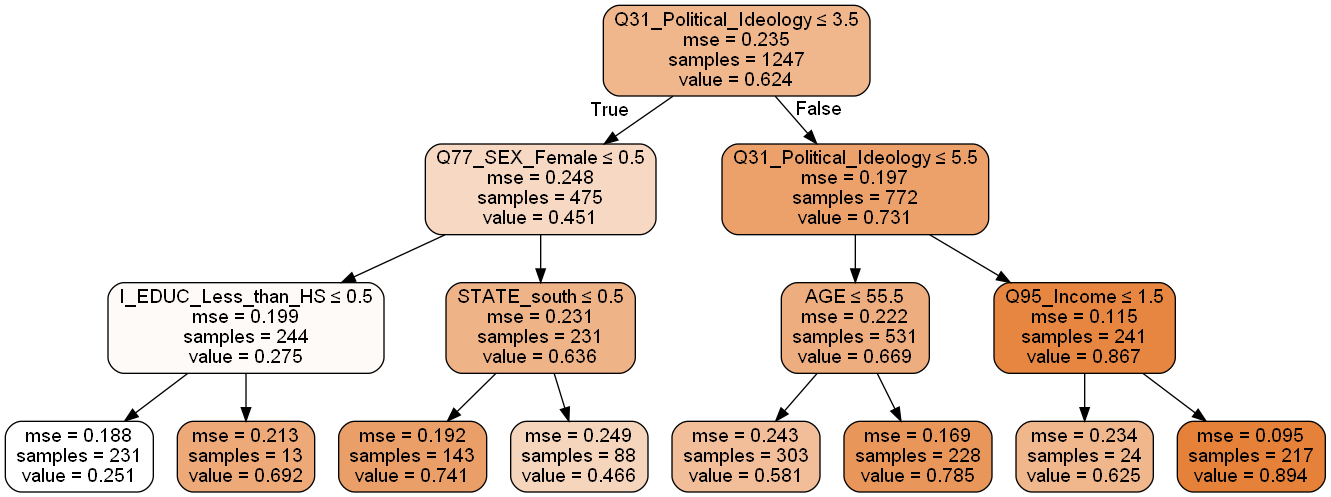

In [96]:
from sklearn import tree

from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(tree1, out_file=dot_data,  
                     feature_names=non_nan.columns[8:32],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

## 2) Decision Tree for Ban on High Capacity Ammunition Magazines

In [97]:
parameters = [
  {'max_depth': (1,2,3,4,5,6,7,8,9,10)},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Gun_safety_programs"]])
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
{'max_depth': 3}


In [98]:
tree2 = DecisionTreeRegressor(max_depth=3)

tree2.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Gun_safety_programs"]])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

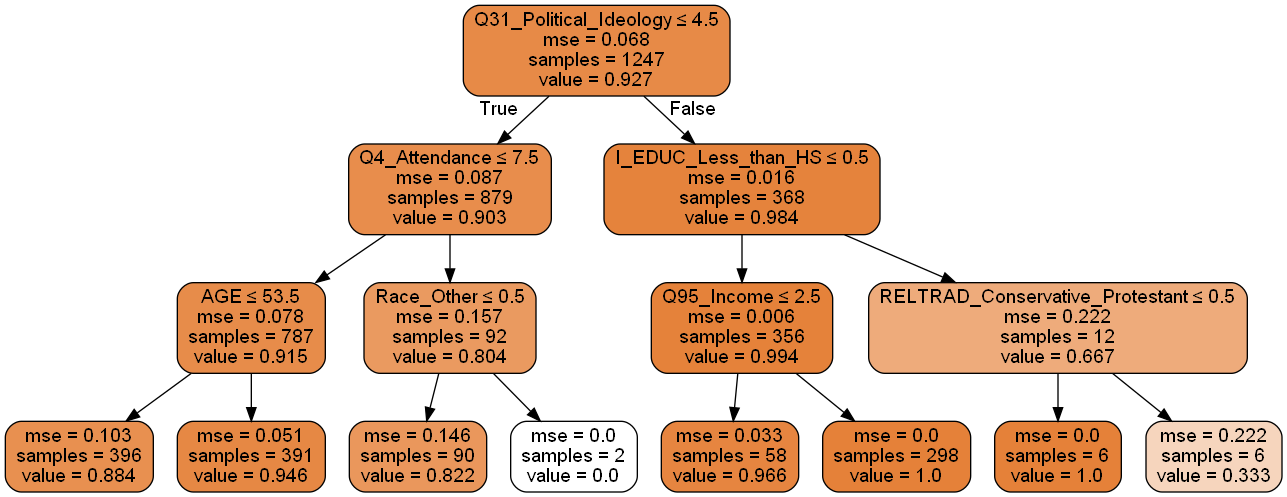

In [99]:
dot_data = StringIO()  
tree.export_graphviz(tree2, out_file=dot_data,  
                     feature_names=non_nan.columns[8:32],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

## 3) Decision Tree for Ban Civilian Handguns

In [100]:
parameters = [
  {'max_depth': (1,2,3,4,5,6,7,8,9,10)},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Ban_Civilian_Handguns"]])
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
{'max_depth': 3}


In [101]:
tree3 = DecisionTreeRegressor(max_depth=3)

tree3.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Ban_Civilian_Handguns"]])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

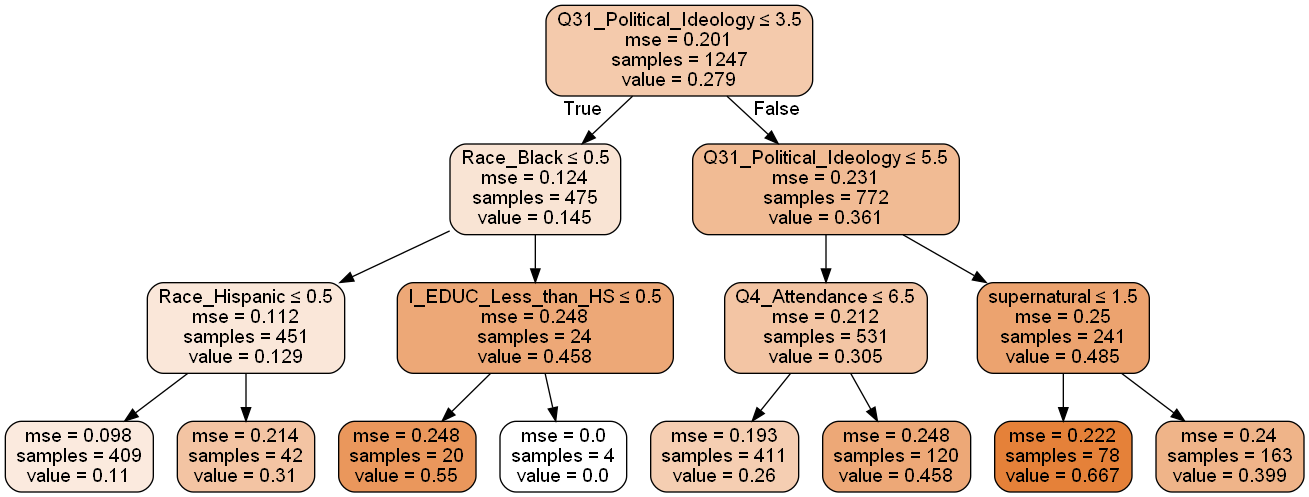

In [102]:
dot_data = StringIO()  
tree.export_graphviz(tree3, out_file=dot_data,  
                     feature_names=non_nan.columns[8:32],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

## 4) Decision Tree for Support for Concealed Carry Laws

In [103]:
parameters = [
  {'max_depth': (1,2,3,4,5,6,7,8,9,10)},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Support_for_Concealed_Carry"]])
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
{'max_depth': 2}


In [104]:
tree4 = DecisionTreeRegressor(max_depth=2)

tree4.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Support_for_Concealed_Carry"]])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

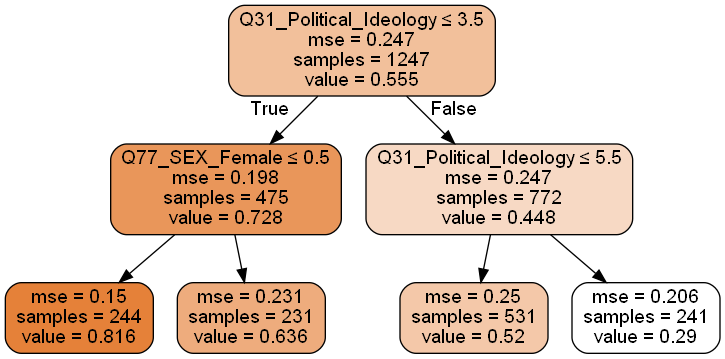

In [105]:
dot_data = StringIO()  
tree.export_graphviz(tree4, out_file=dot_data,  
                     feature_names=non_nan.columns[8:32],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

## 5) Decision Tree for Ban on Better Armed Security


In [106]:
parameters = [
  {'max_depth': (1,2,3,4,5,6,7,8,9,10)},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Better_Armed_Security"]])
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
{'max_depth': 3}


In [107]:
tree5 = DecisionTreeRegressor(max_depth=3)

tree5.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Better_Armed_Security"]])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

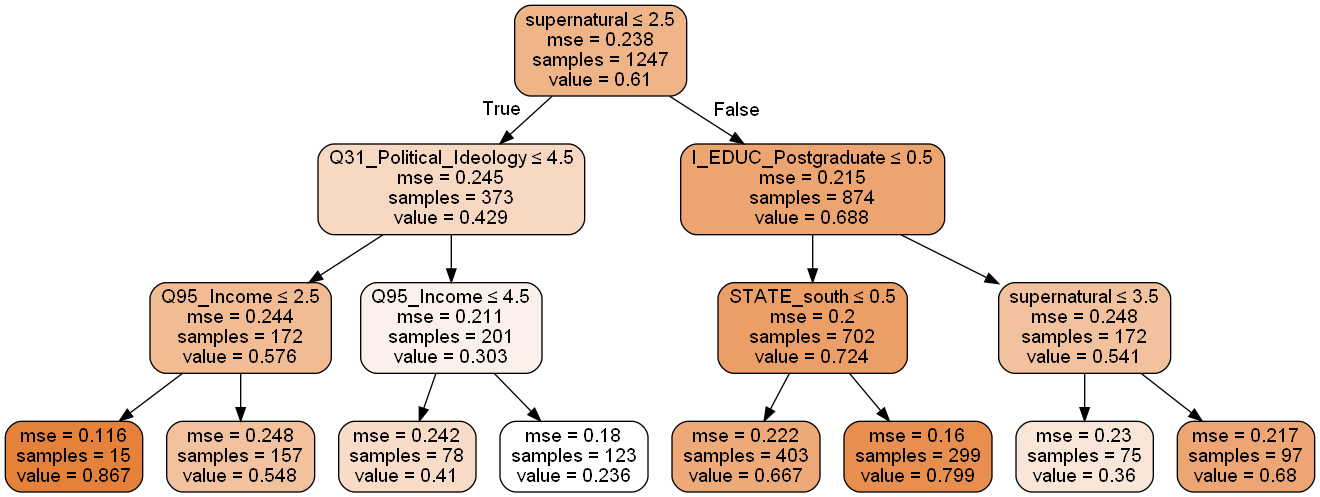

In [108]:
dot_data = StringIO()  
tree.export_graphviz(tree5, out_file=dot_data,  
                     feature_names=non_nan.columns[8:32],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

## 6) Decision Tree for More Teachers with Guns

In [109]:
parameters = [
  {'max_depth': (1,2,3,4,5,6,7,8,9,10)},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["More_Teachers_Guns"]])
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
{'max_depth': 2}


In [110]:
tree6 = DecisionTreeRegressor(max_depth=2)

tree6.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["More_Teachers_Guns"]])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

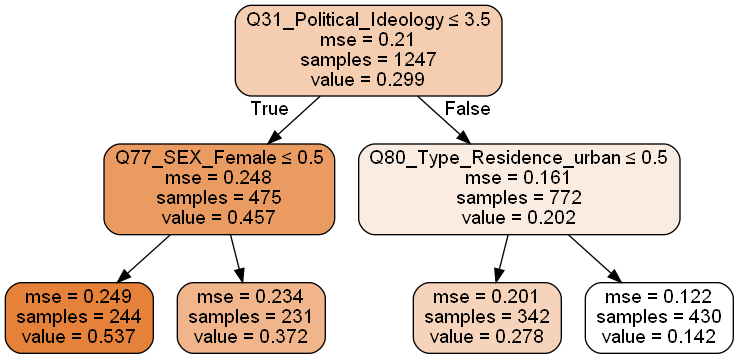

In [111]:
dot_data = StringIO()  
tree.export_graphviz(tree6, out_file=dot_data,  
                     feature_names=non_nan.columns[8:32],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

## 7) Decision Tree for Required Gun Safety Programs

In [112]:
parameters = [
  {'max_depth': (1,2,3,4,5,6,7,8,9,10)},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Gun_safety_programs"]])
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
{'max_depth': 3}


In [113]:
tree7 = DecisionTreeRegressor(max_depth=3)

tree7.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Gun_safety_programs"]])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

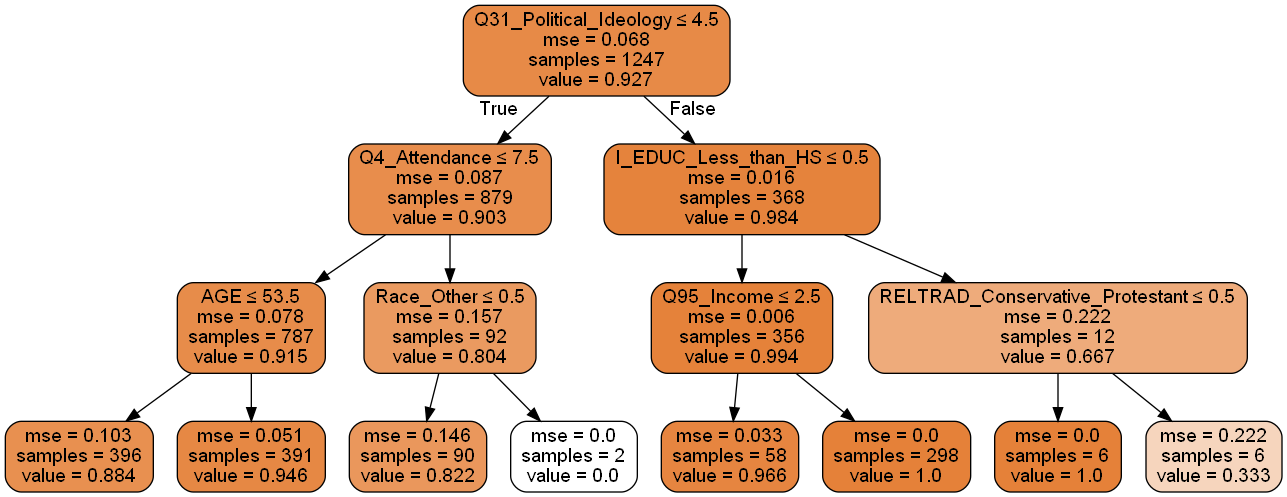

In [114]:
dot_data = StringIO()  
tree.export_graphviz(tree7, out_file=dot_data,  
                     feature_names=non_nan.columns[8:32],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

## 8) Decision Tree for Expanded Mental Health Screening

In [115]:
parameters = [
  {'max_depth': (1,2,3,4,5,6,7,8,9,10)},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Expanded_Mentan_Screening"]])
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
{'max_depth': 1}


In [116]:
tree8 = DecisionTreeRegressor(max_depth=1)

tree8.fit(non_nan.loc[:, 'Q4_Attendance':'Race_Other'], non_nan[["Expanded_Mentan_Screening"]])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

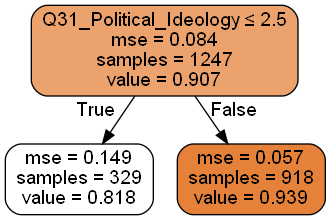

In [117]:
dot_data = StringIO()  
tree.export_graphviz(tree8, out_file=dot_data,  
                     feature_names=non_nan.columns[8:32],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 